In [8]:
library(Ecdat)
library(reshape2)
library(survminer) # More advanced visualizations
library(survival)


In [9]:
# Check out the help page for this dataset
help(GBSG2, package = "TH.data")

# Load the data
data(GBSG2, package = "TH.data")

# Look at the summary of the dataset
head(GBSG2)
summary(GBSG2)

,horTh,age,menostat,tsize,tgrade,pnodes,progrec,estrec,time,cens
,<fct>,<int>,<fct>,<int>,<ord>,<int>,<int>,<int>,<int>,<int>
1,no,70,Post,21,II,3,48,66,1814,1
2,yes,56,Post,12,II,7,61,77,2018,1
3,yes,58,Post,35,II,9,52,271,712,1
4,yes,59,Post,17,II,4,60,29,1807,1
5,no,73,Post,35,II,1,26,65,772,1
6,no,32,Pre,57,III,24,0,13,448,1


 horTh          age        menostat       tsize        tgrade   
 no :440   Min.   :21.00   Pre :290   Min.   :  3.00   I  : 81  
 yes:246   1st Qu.:46.00   Post:396   1st Qu.: 20.00   II :444  
           Median :53.00              Median : 25.00   III:161  
           Mean   :53.05              Mean   : 29.33            
           3rd Qu.:61.00              3rd Qu.: 35.00            
           Max.   :80.00              Max.   :120.00            
     pnodes         progrec           estrec             time       
 Min.   : 1.00   Min.   :   0.0   Min.   :   0.00   Min.   :   8.0  
 1st Qu.: 1.00   1st Qu.:   7.0   1st Qu.:   8.00   1st Qu.: 567.8  
 Median : 3.00   Median :  32.5   Median :  36.00   Median :1084.0  
 Mean   : 5.01   Mean   : 110.0   Mean   :  96.25   Mean   :1124.5  
 3rd Qu.: 7.00   3rd Qu.: 131.8   3rd Qu.: 114.00   3rd Qu.:1684.8  
 Max.   :51.00   Max.   :2380.0   Max.   :1144.00   Max.   :2659.0  
      cens       
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median 

GBSG2 {TH.data},R Documentation


*Why Survival Analysis?*

* Times are always positive and we need a distribution to reflect this (Weidbull, etc.)
* Different measures are of interest. (i.e. Hazard function)
* Censoring almost always an issue. I.E. There aree times you haven't observed the event


  0   1 
387 299 

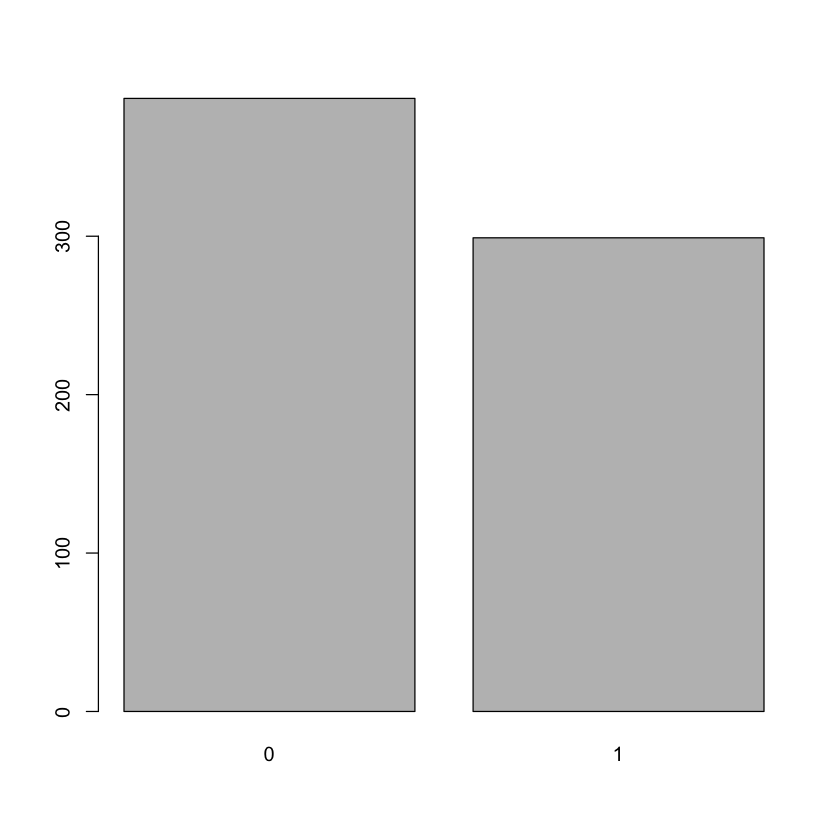

In [10]:
num_cens <- table(GBSG2$cens)
num_cens

# Create barplot of censored and uncensored data
barplot(num_cens)

In [11]:
# Create Surv-Object
sobj <- Surv(GBSG2$time, GBSG2$cens)

# Look at 10 first elements
sobj[0:10]

# Look at summary
summary(sobj)

# Look at structure
str(sobj)

 [1] 1814  2018   712  1807   772   448  2172+ 2161+  471  2014+

      time            status      
 Min.   :   8.0   Min.   :0.0000  
 1st Qu.: 567.8   1st Qu.:0.0000  
 Median :1084.0   Median :0.0000  
 Mean   :1124.5   Mean   :0.4359  
 3rd Qu.:1684.8   3rd Qu.:1.0000  
 Max.   :2659.0   Max.   :1.0000  

 'Surv' num [1:686, 1:2] 1814  2018   712  1807   772   448  2172+ 2161+  471  2014+ ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "time" "status"
 - attr(*, "type")= chr "right"


The UnempDur dataset

The UnempDur dataset contains information on how long people stay unemployed. In this case, the event (finding a job) is something positive. This information is stored in the censor1 variable, which has a value of 1 if an individual was re-employed at a full-time job. The spell variable indicates the length of time an individual was unemployed in number of two-week intervals.

In this exercise, you'll explore these censored values and create a Surv object, just as you did in the previous exercises with the GBSG2 dataset.


   0    1 
2270 1073 

 [1] 3  6  1  3  0+ 9+ 1+ 0  2  1+

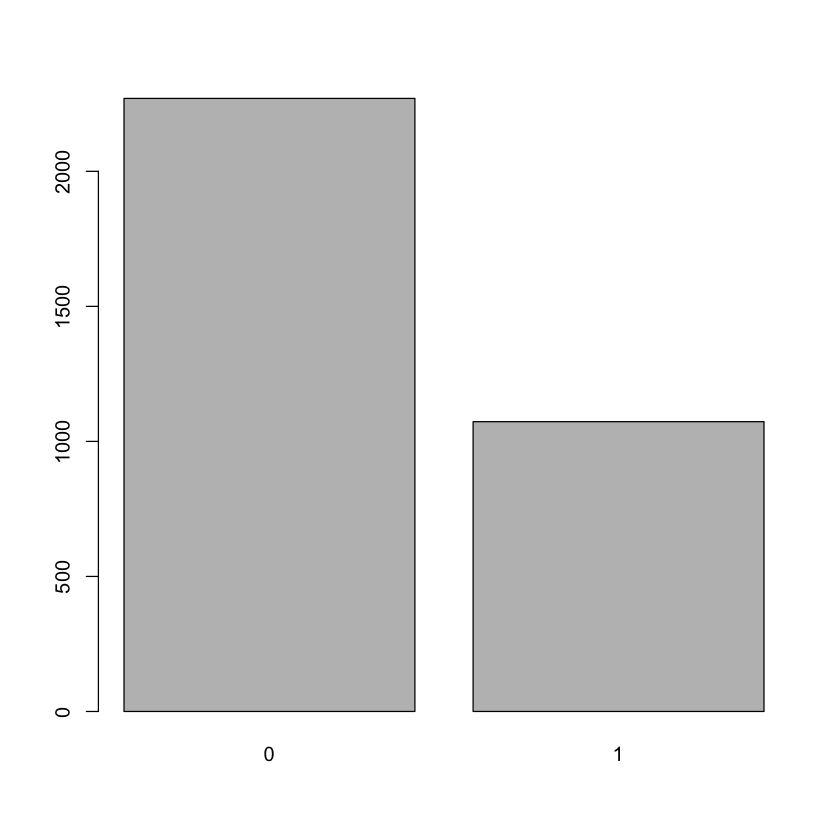

In [12]:
# Load the UnempDur data
data(UnempDur, package="Ecdat")

# Count censored and uncensored data
cens_employ_ft <- table(UnempDur$censor1)
cens_employ_ft

# Create barplot of censored and uncensored data
barplot(cens_employ_ft)

# Create Surv-Object
sobj <- Surv(UnempDur$tenure, UnempDur$censor1)

# Look at 10 first elements
sobj[0:10]

Survival analysis Questions

* What is the probability that a breast cancer patient survives longer than 5 years?
* Wht is the typical waiting time for a cab?
* Out of 100 unemployed people, how many do we expect to have a job again after 2 months?

Survival Function -> Probability that duration is longer than t. 

1 - cum dist function. 

Can tell me for any point t, the prob of the event



**Estimation of Survival curves**

Reason why can't just use the cumulative density function is once again due to censoring. (Otherwise we could)

Keplan-Meier Estiamte -> Proportion of individuals 'surviving' at each timepoint. Only when its realized (dont count censored points)

In [13]:
# Create time and event data
time <- c(5, 6, 2, 4, 4)
event <- c(1, 0, 0, 1, 1)

# Compute Kaplan-Meier estimate
km <- survfit(Surv(time, event) ~ 1) # ~ 1 denotes 1 survival curve for all observations (patients)
km

# Take a look at the structure
str(km)

# Create data.frame
data.frame(time = km$time, n.risk = km$n.risk, n.event = km$n.event,
  n.censor = km$n.censor, surv = km$surv)

Call: survfit(formula = Surv(time, event) ~ 1)

     n events median 0.95LCL 0.95UCL
[1,] 5      3    4.5       4      NA

List of 16
 $ n        : int 5
 $ time     : num [1:4] 2 4 5 6
 $ n.risk   : num [1:4] 5 4 2 1
 $ n.event  : num [1:4] 0 2 1 0
 $ n.censor : num [1:4] 1 0 0 1
 $ surv     : num [1:4] 1 0.5 0.25 0.25
 $ std.err  : num [1:4] 0 0.5 0.866 0.866
 $ cumhaz   : num [1:4] 0 0.5 1 1
 $ std.chaz : num [1:4] 0 0.354 0.612 0.612
 $ type     : chr "right"
 $ logse    : logi TRUE
 $ conf.int : num 0.95
 $ conf.type: chr "log"
 $ lower    : num [1:4] 1 0.1877 0.0458 0.0458
 $ upper    : num [1:4] 1 1 1 1
 $ call     : language survfit(formula = Surv(time, event) ~ 1)
 - attr(*, "class")= chr "survfit"


time,n.risk,n.event,n.censor,surv
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,5,0,1,1.00
4,4,2,0,0.50
5,2,1,0,0.25
6,1,0,1,0.25


In [14]:
?survfit

survfit {survival},R Documentation
formula,either a formula or a previously fitted model
...,other arguments to the specific method


You throw a party and at 1 a.m. guests suddenly start dancing. You are curious to analyze how long your guests will dance for and start collecting data. The problem is that you get tired and go to bed after a while.

You obtain the following right censored dancing times data given in dancedat:

* name is the name of your friend.
* time is the right-censored dancing time.
* obs_end indicates if you observed the end of your friends dance (1) or if you went to sleep before they stopped dancing (0).

You start analyzing the data in the morning, but you are tired and, at first, ignore the fact that you have censored observations. Then you remember this course and do it correctly.

Warning message:
“Problem with `mutate()` input `survtable`.
ℹ `select_()` is deprecated as of dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.
ℹ Input `survtable` is `purrr::map2(...)`.”
Warning message:
“`select_()` is deprecated as of dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


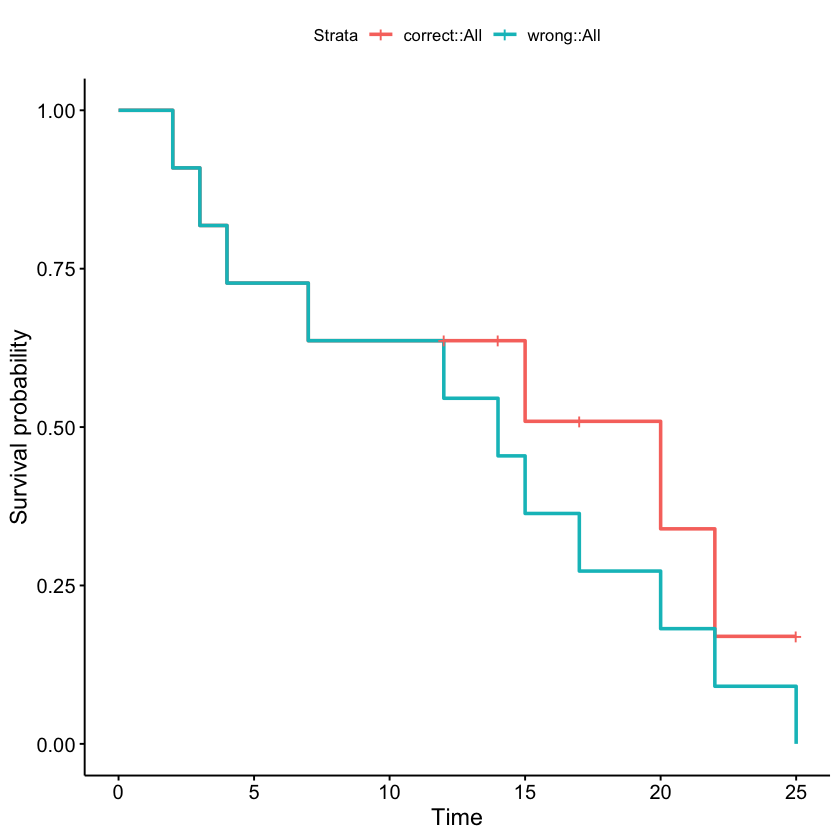

In [15]:
# Create dancedat data
dancedat <- data.frame(
  name = c("Chris", "Martin", "Conny", "Desi", "Reni", "Phil", 
    "Flo", "Andrea", "Isaac", "Dayra", "Caspar"),
  time = c(20, 2, 14, 22, 3, 7, 4, 15, 25, 17, 12),
  obs_end = c(1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0))

# Estimate the survivor function pretending that all censored observations are actual observations.
km_wrong <- survfit(Surv(time) ~ 1, data = dancedat)

# Estimate the survivor function from this dataset via kaplan-meier.
km <- survfit(Surv(time, obs_end) ~ 1, data = dancedat)

# Plot the two and compare
ggsurvplot_combine(list(correct = km, wrong = km_wrong))

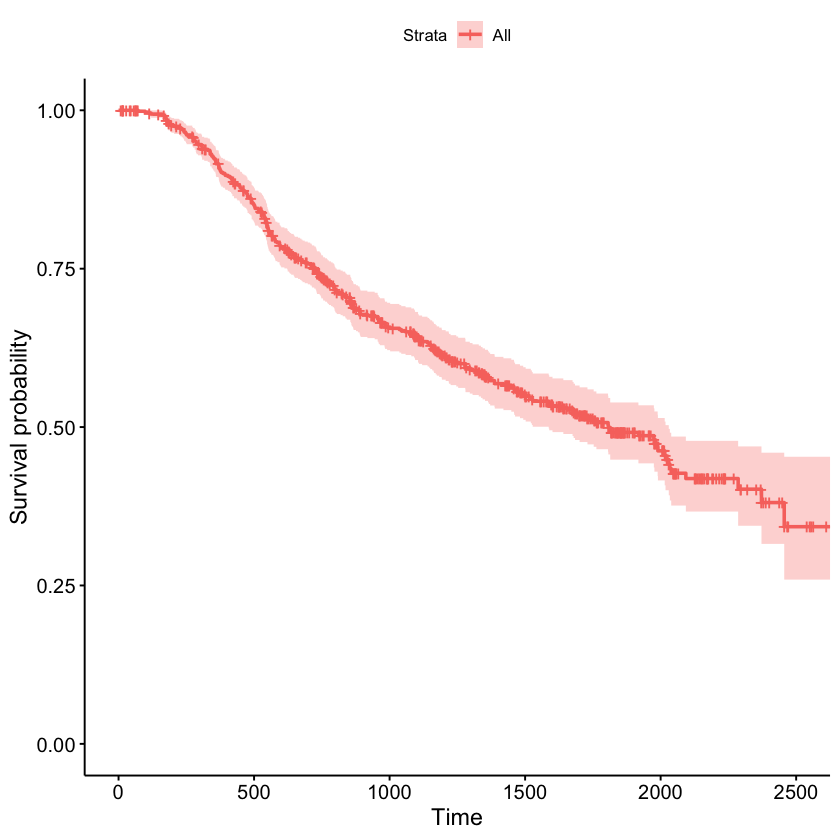

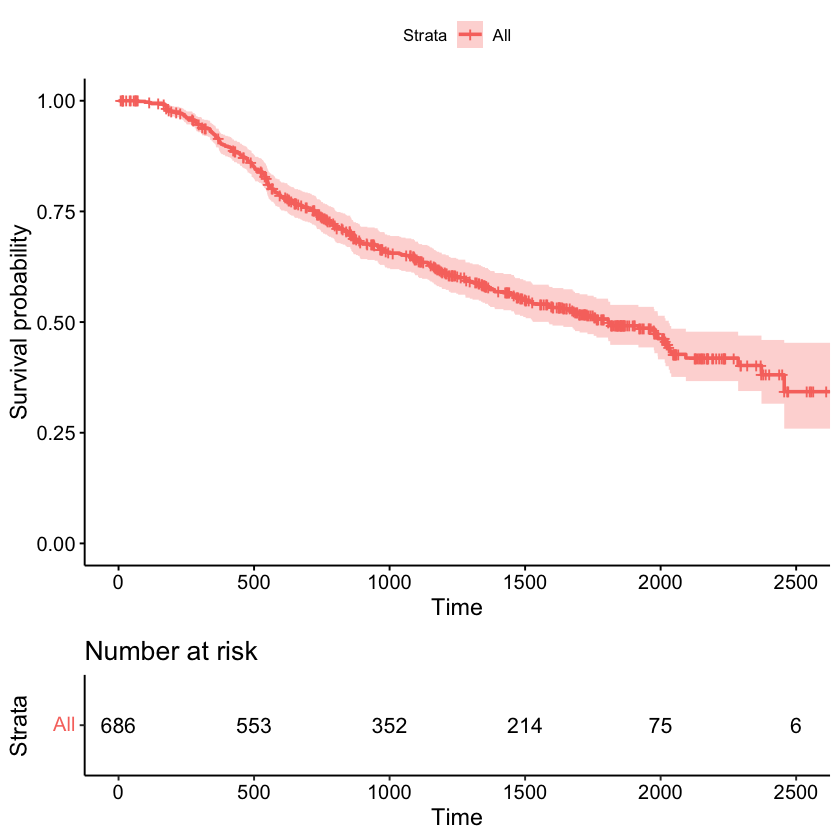

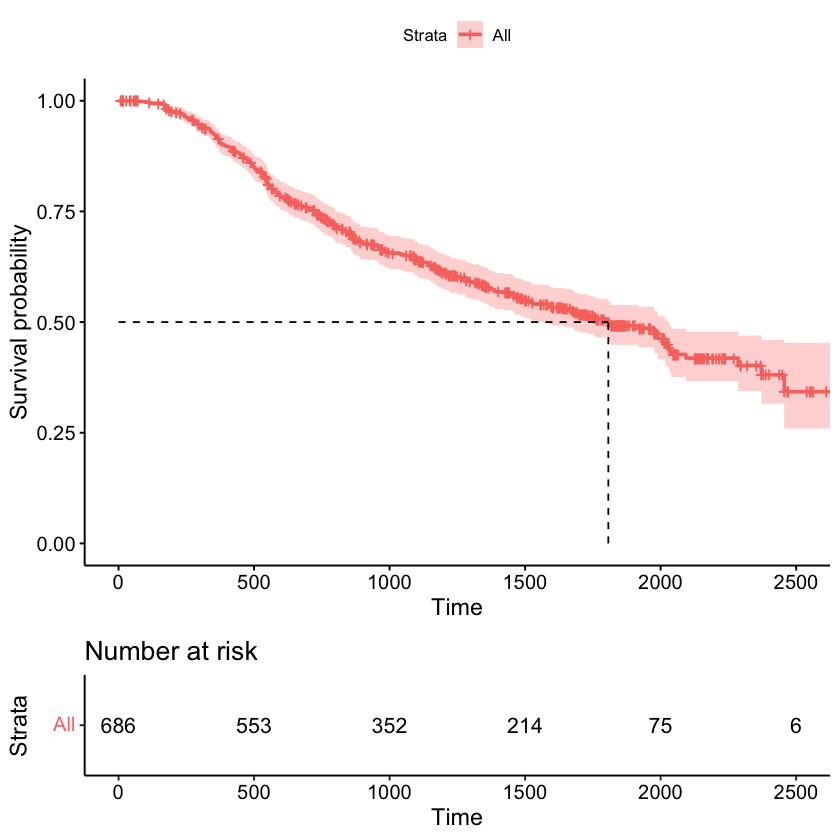

In [16]:
# Kaplan-Meier estimate
km <- survfit(Surv(time, cens) ~ 1, data = GBSG2)

# plot of the Kaplan-Meier estimate
ggsurvplot(km)

# add the risk table to plot
ggsurvplot(km, risk.table = TRUE)

# add a line showing the median survival time
ggsurvplot(km, risk.table = TRUE, surv.median.line = "hv")

Weibull model

Kaplan-Meier is a step function similar to a histogram. Weibull is a continuous distribution

In [17]:
# Weibull model
wb <- survreg(Surv(time, cens) ~ 1, data = GBSG2)

# Compute the median survival from the model
predict(wb, type = "quantile", p = 0.5, newdata = data.frame(1))

1 
1693.93

In [18]:
# Weibull model
wb <- survreg(Surv(time, cens) ~ 1, data = GBSG2)

# 70 Percent of patients survive beyond time point...
predict(wb, type = 'quantile', p = 1 - .7, newdata = data.frame(1))

1 
1004.524

In [19]:
# Weibull model
wb <- survreg(Surv(time, cens) ~ 1, data=GBSG2)

# Retrieve survival curve from model probabilities 
surv <- seq(.99, .01, by = -.01)

# Get time for each probability
t <- predict(wb, type = 'quantile', p = 1 - surv, newdata = data.frame(1)) # p is prob of the event

# Create data frame with the information
surv_wb <- data.frame(time = t, surv = surv)

# Look at first few lines of the result
head(surv_wb)

,time,surv
,<dbl>,<dbl>
1,60.6560,0.99
2,105.0392,0.98
3,145.0723,0.97
4,182.6430,0.96
5,218.5715,0.95
6,253.3125,0.94


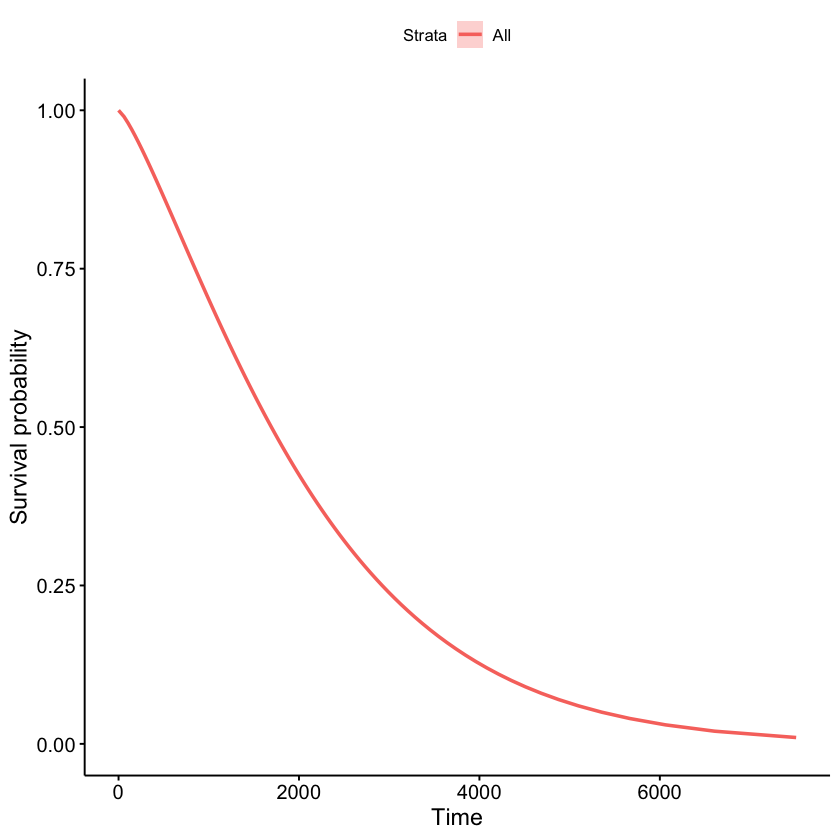

In [20]:
# Weibull model
wb <- survreg(Surv(time, cens) ~ 1, GBSG2)

# Retrieve survival curve from model
surv <- seq(.99, .01, by = -.01)

# Get time for each probability
t <- predict(wb, type = 'quantile', p = 1 - surv, newdata = data.frame(1))

# Create data frame with the information needed for ggsurvplot_df
surv_wb <- data.frame(time = t, surv = surv, 
  upper = NA, lower = NA, std.err = NA)

# Plot
ggsurvplot_df(fit = surv_wb, surv.geom = geom_line)

*Weibull Model*

In [21]:
# Estimate a Weibull model
#wbmod <- survreg(Surv(time, status) ~ sex, data = dat)
#coef(wbmod)
#positive coefficient -> Longer time to event

In [22]:
# Weibull model
wbmod <- survreg(Surv(time, cens) ~ horTh, data = GBSG2)

# Retrieve survival curve from model
surv <- seq(.99, .01, by = -.01)
t_yes <- predict(wbmod, type = "quantile", p = 1 - surv,
  newdata = data.frame(horTh = 'yes'))

# Take a look at survival curve
str(t_yes)

 num [1:99] 76.4 131.4 180.9 227.2 271.4 ...


Visualize Weibull Models
  * Compute Weibull model
  * Decide on 'imaginary patients' to patients
  * Compute survival curves for imaginary patients
  * Create data.frame with survival curve information. Reformat each line is 1 time point for each patient
  * plot


ggsurvplot_df() allows for argument fit to only be a data.frame, while ggsurvplot() allows different types of objects.

In [23]:
# Weibull model
wbmod <- survreg(Surv(time, cens) ~ horTh + tsize, data = GBSG2)

# Imaginary patients
newdat <- expand.grid(
  horTh = levels(GBSG2$horTh),
  tsize = quantile(GBSG2$tsize, probs = c(0.25, 0.5, 0.75)))

# Compute survival curves
surv <- seq(.99, .01, by = -.01)
t <- predict(wbmod, type = 'quantile', p = 1 - surv,
  newdata = newdat)

# How many rows and columns does t have?
dim(t)

[1]  6 99

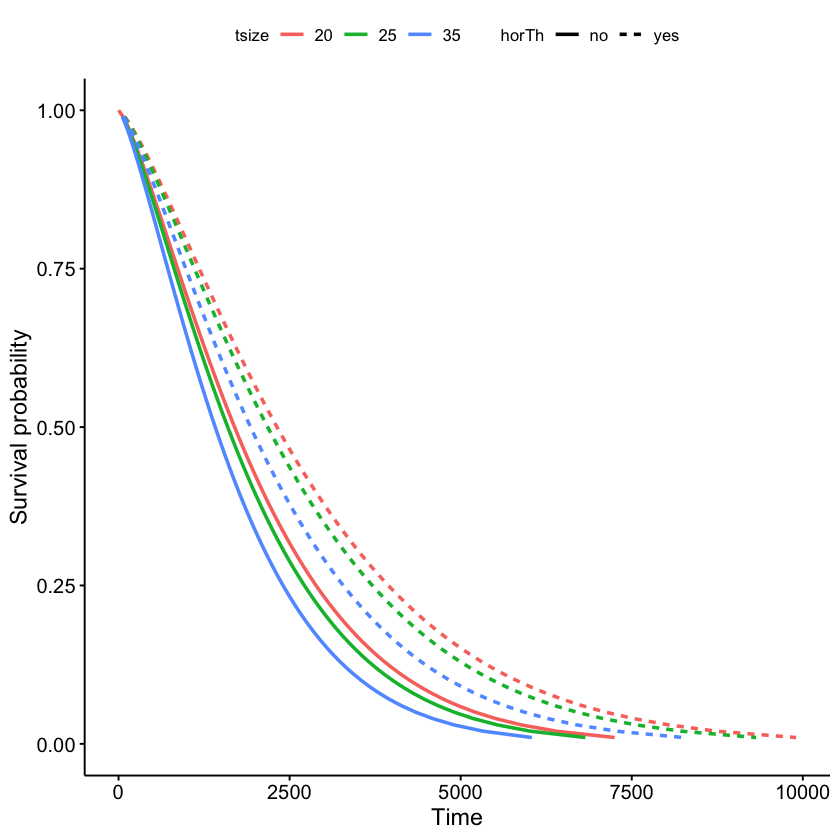

In [24]:
# Use cbind() to combine the information in newdat with t
surv_wbmod_wide <- cbind(newdat, t)
  
# Use melt() to bring the data.frame to long format
surv_wbmod <- melt(surv_wbmod_wide, id.vars = c("horTh", "tsize"), variable.name = "surv_id", value.name = "time")

# Use surv_wbmod$surv_id to add the correct survival probabilities surv
surv_wbmod$surv <- surv[as.numeric(surv_wbmod$surv_id)]

# Add columns upper, lower, std.err, and strata to the data.frame
surv_wbmod[, c("upper", "lower", "std.err", "strata")] <- NA

# Plot the survival curves
ggsurvplot_df(surv_wbmod, surv.geom = geom_line,
  linetype = 'horTh', color = 'tsize', legend.title = NULL)

geom_line will produce a smooth line correctly representing the survival curve estimate from the Weibull model (the default surv.geom = geom_step shows a step function and is incorrect for Weibull models).

Weiball model makes assumptins on the distribution of the outcome

Can choose different districutions such as weibull, exponential, lognormal, etc. The curves will look slightly different

Exponential is a special case of weibull and weibull is more flexible 

In [25]:
# Weibull model
wbmod <- survreg(Surv(time, cens) ~ horTh, data = GBSG2)

# Log-Normal model
lnmod <- survreg(Surv(time, cens) ~ horTh, data = GBSG2, dist = "lognormal")

# Newdata
newdat <- data.frame(horTh = levels(GBSG2$horTh))

# Surv
surv <- seq(.99, .01, by = -.01)

# Survival curve from Weibull model and log-normal model
wbt <- predict(wbmod, type = "quantile", p = 1 - surv, newdata = newdat)
lnt <- predict(lnmod, type = 'quantile', p = 1 - surv, newdata = newdat)

In [26]:
wbt_wide <- cbind(newdat, wbt)
wbt_wide$dist <- 'weibull'
lnt_wide <- cbind(newdat, lnt)
lnt_wide$dist <- 'lognormal'
surv_wide <- rbind(wbt_wide, lnt_wide)

In [27]:
# Melt the data.frame into long format.
surv_long <- melt(surv_wide, id.vars = c("horTh", "dist"), variable.name = "surv_id", value.name = "time")

# Add column for the survival probabilities
surv_long$surv <- surv[as.numeric(surv_long$surv_id)]

# Add columns upper, lower, std.err, and strata contianing NA values
surv_long[, c("upper", "lower", "std.err", "strata")] <- NA

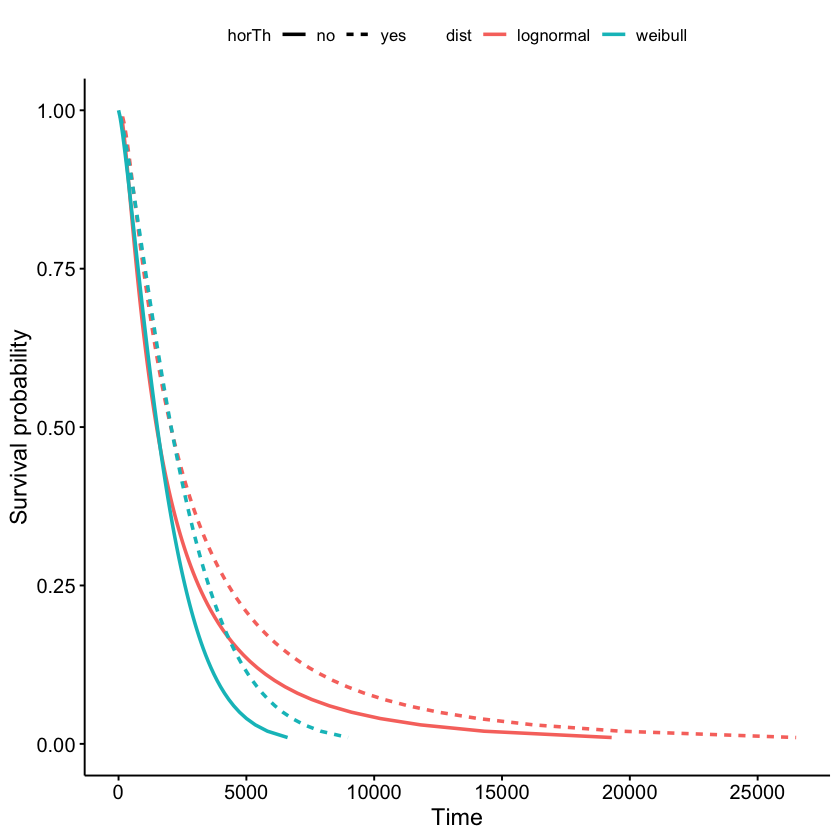

In [28]:
# Plot the survival curves
ggsurvplot_df(surv_long, surv.geom = geom_line,
              linetype = 'horTh', color = 'dist', legend.title = NULL)

**The Cox Proportional Model**

Most widely used. Similar to weibull allows you to compute covariates

Also called proportional hazards. Assume instantenous rate of occurance of the event is assumed to be proportional. Surival curves can cross and if they do, both cox and weibull are not appropriate

Semi-parametric - Less strict assumptions.Does not have an intercept



In [29]:
# Cox model
cxmod <- coxph(Surv(time, cens) ~ horTh + tsize, data = GBSG2)

# Imaginary patients
newdat <- expand.grid(
  horTh = levels(GBSG2$horTh),
  tsize = quantile(GBSG2$tsize, probs = c(0.25, 0.5, 0.75)))
rownames(newdat) <- letters[1:6]

# Compute survival curves
cxsf <- survfit(cxmod, data = GBSG2, newdata = newdat, conf.type = "none")

# Look at first 6 rows of cxsf$surv and time points
head(cxsf$surv)
head(cxsf$time)

a,b,c,d,e,f
1,1,1,1,1,1
1,1,1,1,1,1
1,1,1,1,1,1
1,1,1,1,1,1
1,1,1,1,1,1
1,1,1,1,1,1


[1]  8 15 16 17 18 29

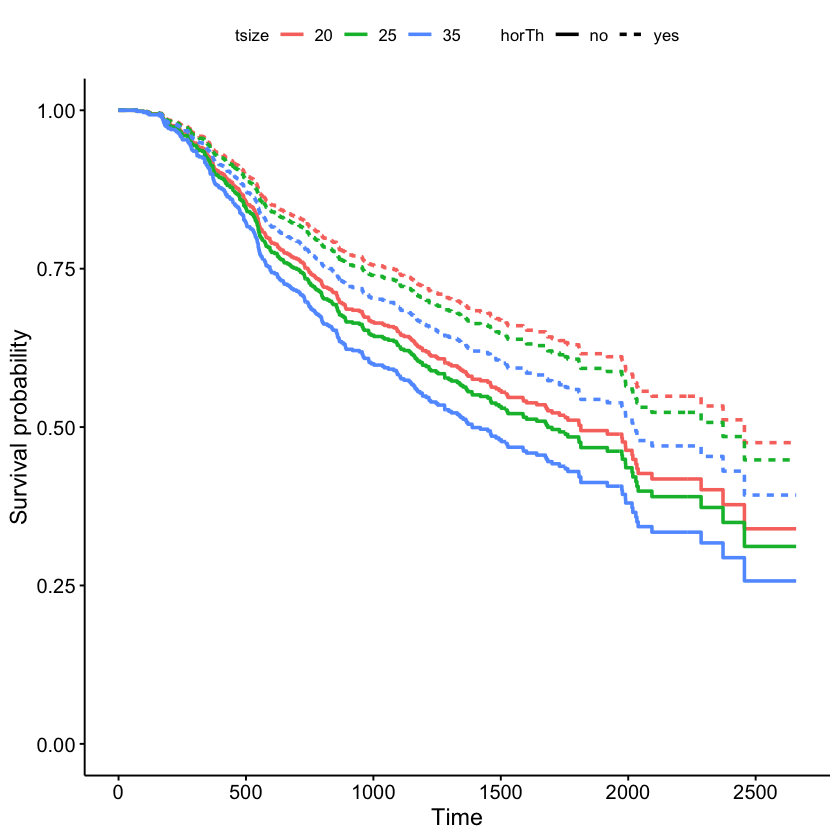

In [30]:
# Compute data.frame needed for plotting
surv_cxmod0 <- surv_summary(cxsf)

# Get a character vector of patient letters (patient IDs)
pid <- as.character(surv_cxmod0$strata)

# Multiple of the rows in newdat so that it fits with surv_cxmod0
m_newdat <- newdat[pid, ]

# Add patient info to data.frame
surv_cxmod <- cbind(surv_cxmod0, m_newdat)

# Plot
ggsurvplot_df(surv_cxmod, linetype = 'horTh', color = 'tsize',
  legend.title = NULL, censor = FALSE)

In [33]:
head(lung)

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,306,2,74,1,1,90,100,1175,NA
2,3,455,2,68,1,0,90,90,1225,15
3,3,1010,1,56,1,0,90,90,NA,15
4,5,210,2,57,1,1,90,60,1150,11
5,1,883,2,60,1,0,100,90,NA,0
6,12,1022,1,74,1,1,50,80,513,0


In [31]:
# # Compute Cox model and survival curves
# cxmod <- coxph(Surv(time, status) ~ performance, data = lung)
# new_lung <- data.frame(performance = c(60, 70, 80, 90))
# cxsf <- survfit(cxmod, data = lung, newdata = new_lung, conf.type = "none")

# # Use the summary of cxsf to take a vector of patient IDs
# surv_cxmod0 <- surv_summary(cxsf)
# pid <- as.character(surv_cxmod0$strata)

# # Duplicate rows in newdat to fit with surv_cxmod0 and add them in
# m_newdat <- new_lung[pid, , drop = FALSE]
# surv_cxmod <- cbind(surv_cxmod0, m_newdat)

# # Plot
# ggsurvplot_df(surv_cxmod, color = 'performance', legend.title = NULL, censor = FALSE)

ERROR: Error in eval(predvars, data, env): object 'performance' not found


In [ ]:
# # Compute Kaplan-Meier curve
# km <- survfit(Surv(time, status) ~ 1, data = lung)

# # Compute Cox model
# cxmod <- coxph(Surv(time, status) ~ performance, data = lung)

# # Compute Cox model survival curves
# new_lung <- data.frame(performance = c(60, 70, 80, 90))
# cxsf <- survfit(cxmod, data = lung, newdata = new_lung, conf.type = "none")

# # Plot Kaplan-Meier curve
# ggsurvplot(km, conf.int = FALSE)

# # Plot Cox model survival curves
# ggsurvplot(cxsf, censor = FALSE)